## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
df = pd.read_csv("../SQL/data/binary_classification.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.shape

(93355, 24)

In [4]:
df.head(1)

,customer_unique_id,t0_order_date,t0_order_id,total_items_value,total_freight_value,n_items,n_sellers,n_distinct_categories,top_category_by_priciest_item,payment_type,payment_value,payment_installments,customer_state,customer_city,y_repeat_90d,dow,month,first_gmv,dow_sin,dow_cos,month_sin,month_cos,installments_bins,top20_categories_and_others
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,e22acc9c116caa3f2b7121bbb380d08e,129.9,12.0,1,1,1,cama_mesa_banho,credit_card,141.9,8.0,SP,cajamar,0,4,5,141.9,-0.433884,-0.900969,0.5,-0.866025,6-11,cama_mesa_banho


## Duplicates/nulls/negative values check

In [5]:
df.duplicated(keep='first').sum()

0

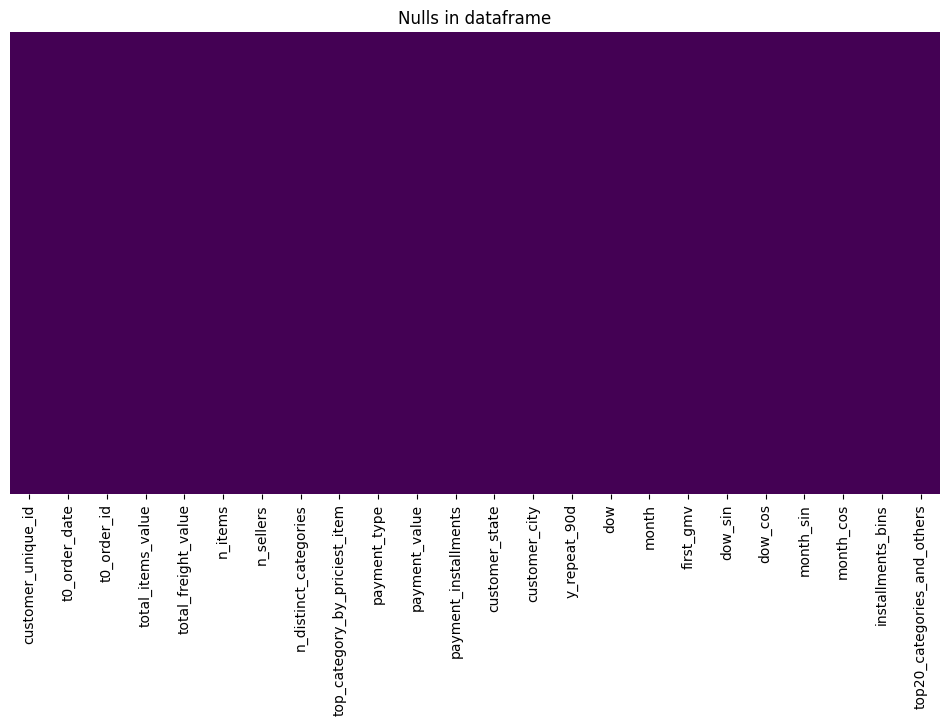

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in dataframe')
plt.savefig('../artifacts/images/classification_EDA/isnull_classification.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
for col in df.columns:
    n_missing = df[col].isna().sum()
    print(f"{col}: {n_missing} values")

customer_unique_id: 0 values
t0_order_date: 0 values
t0_order_id: 0 values
total_items_value: 0 values
total_freight_value: 0 values
n_items: 0 values
n_sellers: 0 values
n_distinct_categories: 0 values
top_category_by_priciest_item: 0 values
payment_type: 1 values
payment_value: 1 values
payment_installments: 1 values
customer_state: 0 values
customer_city: 0 values
y_repeat_90d: 0 values
dow: 0 values
month: 0 values
first_gmv: 0 values
dow_sin: 0 values
dow_cos: 0 values
month_sin: 0 values
month_cos: 0 values
installments_bins: 1 values
top20_categories_and_others: 0 values


In [8]:
columns = ["payment_type", "payment_value", "payment_installments"]
df.dropna(subset=columns, inplace=True)

In [9]:
for col in df.columns:
    n_missing = df[col].isna().sum()
    print(f"{col}: {n_missing} values")

customer_unique_id: 0 values
t0_order_date: 0 values
t0_order_id: 0 values
total_items_value: 0 values
total_freight_value: 0 values
n_items: 0 values
n_sellers: 0 values
n_distinct_categories: 0 values
top_category_by_priciest_item: 0 values
payment_type: 0 values
payment_value: 0 values
payment_installments: 0 values
customer_state: 0 values
customer_city: 0 values
y_repeat_90d: 0 values
dow: 0 values
month: 0 values
first_gmv: 0 values
dow_sin: 0 values
dow_cos: 0 values
month_sin: 0 values
month_cos: 0 values
installments_bins: 0 values
top20_categories_and_others: 0 values


In [10]:
df.dtypes

customer_unique_id                object
t0_order_date                     object
t0_order_id                       object
total_items_value                float64
total_freight_value              float64
n_items                            int64
n_sellers                          int64
n_distinct_categories              int64
top_category_by_priciest_item     object
payment_type                      object
payment_value                    float64
payment_installments             float64
customer_state                    object
customer_city                     object
y_repeat_90d                       int64
dow                                int64
month                              int64
first_gmv                        float64
dow_sin                          float64
dow_cos                          float64
month_sin                        float64
month_cos                        float64
installments_bins                 object
top20_categories_and_others       object
dtype: object

##### NOTE: *t0_order_date needs to be change into datetime and payment_installments into int.*

In [11]:
columns = [3, 4, 5, 6, 7, 10, 11, 14, 15, 16, 17]
negatives = (df.iloc[:,columns]< 0).any()
negatives

total_items_value        False
total_freight_value      False
n_items                  False
n_sellers                False
n_distinct_categories    False
payment_value            False
payment_installments     False
y_repeat_90d             False
dow                      False
month                    False
first_gmv                False
dtype: bool

##### NOTE: *There aren't any negative values.*

## Converting columns types

In [12]:
df.dtypes

customer_unique_id                object
t0_order_date                     object
t0_order_id                       object
total_items_value                float64
total_freight_value              float64
n_items                            int64
n_sellers                          int64
n_distinct_categories              int64
top_category_by_priciest_item     object
payment_type                      object
payment_value                    float64
payment_installments             float64
customer_state                    object
customer_city                     object
y_repeat_90d                       int64
dow                                int64
month                              int64
first_gmv                        float64
dow_sin                          float64
dow_cos                          float64
month_sin                        float64
month_cos                        float64
installments_bins                 object
top20_categories_and_others       object
dtype: object

In [13]:
df["t0_order_date"] = pd.to_datetime(df["t0_order_date"], format='%Y-%m-%d %H:%M:%S')

In [14]:
df["payment_installments"] = df["payment_installments"].astype(int)

In [15]:
df.dtypes

customer_unique_id                       object
t0_order_date                    datetime64[ns]
t0_order_id                              object
total_items_value                       float64
total_freight_value                     float64
n_items                                   int64
n_sellers                                 int64
n_distinct_categories                     int64
top_category_by_priciest_item            object
payment_type                             object
payment_value                           float64
payment_installments                      int32
customer_state                           object
customer_city                            object
y_repeat_90d                              int64
dow                                       int64
month                                     int64
first_gmv                               float64
dow_sin                                 float64
dow_cos                                 float64
month_sin                               

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93354 entries, 0 to 93354
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             93354 non-null  object        
 1   t0_order_date                  93354 non-null  datetime64[ns]
 2   t0_order_id                    93354 non-null  object        
 3   total_items_value              93354 non-null  float64       
 4   total_freight_value            93354 non-null  float64       
 5   n_items                        93354 non-null  int64         
 6   n_sellers                      93354 non-null  int64         
 7   n_distinct_categories          93354 non-null  int64         
 8   top_category_by_priciest_item  93354 non-null  object        
 9   payment_type                   93354 non-null  object        
 10  payment_value                  93354 non-null  float64       
 11  payment_installments

In [17]:
df["top_category_by_priciest_item"].unique()

array(['cama_mesa_banho', 'beleza_saude', 'papelaria', 'telefonia',
       'ferramentas_jardim', 'esporte_lazer',
       'fashion_bolsas_e_acessorios', 'malas_acessorios',
       'informatica_acessorios', 'fashion_underwear_e_moda_praia',
       'eletrodomesticos', 'instrumentos_musicais', 'casa_conforto',
       'utilidades_domesticas', 'eletroportateis', 'relogios_presentes',
       'moveis_sala', 'eletronicos', 'moveis_escritorio', 'automotivo',
       'moveis_decoracao', 'perfumaria',
       'construcao_ferramentas_construcao', 'bebidas',
       'livros_interesse_geral', 'consoles_games', 'brinquedos',
       'cool_stuff', 'artigos_de_natal', 'bebes', 'pet_shop', 'UNKNOWN',
       'casa_construcao', 'eletrodomesticos_2', 'telefonia_fixa',
       'flores', 'construcao_ferramentas_seguranca', 'fashion_calcados',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'artes',
       'alimentos_bebidas', 'alimentos', 'livros_tecnicos',
       'industria_comercio_e_negocios', 'audio',

In [18]:
df.describe().select_dtypes(include=['float64', 'int64', 'int32']).map(lambda x: f'{x:0.2f}')

,total_items_value,total_freight_value,n_items,n_sellers,n_distinct_categories,payment_value,payment_installments,y_repeat_90d,dow,month,first_gmv,dow_sin,dow_cos,month_sin,month_cos
count,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00,93354.00
mean,137.53,22.78,1.14,1.01,1.01,160.34,2.92,0.02,3.73,6.04,160.31,0.05,-0.11,0.08,-0.12
min,0.85,0.00,1.00,1.00,1.00,9.59,0.00,0.00,1.00,1.00,9.59,-0.97,-0.90,-1.00,-1.00
25%,45.90,13.85,1.00,1.00,1.00,62.01,1.00,0.00,2.00,3.00,62.00,-0.78,-0.90,-0.50,-0.87
50%,86.90,17.17,1.00,1.00,1.00,105.30,2.00,0.00,4.00,6.00,105.30,-0.00,-0.22,0.00,-0.50
75%,149.90,24.00,1.00,1.00,1.00,176.65,4.00,0.00,5.00,8.00,176.62,0.78,0.62,0.87,0.50
max,13440.00,1794.96,21.00,5.00,3.00,13664.08,24.00,1.00,7.00,12.00,13664.08,0.97,1.00,1.00,1.00
std,210.72,21.61,0.53,0.12,0.09,220.51,2.70,0.14,1.87,3.23,220.49,0.73,0.67,0.69,0.71


## Visualizations

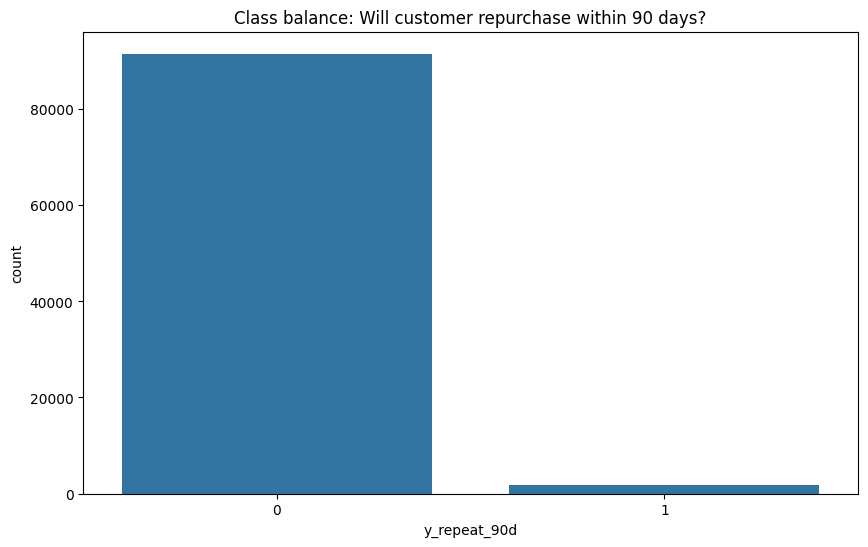

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="y_repeat_90d")
plt.title("Class balance: Will customer repurchase within 90 days?")
plt.savefig("../artifacts/images/classification_EDA/class_balance.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *Very unbalanced classes. Weighting required.*

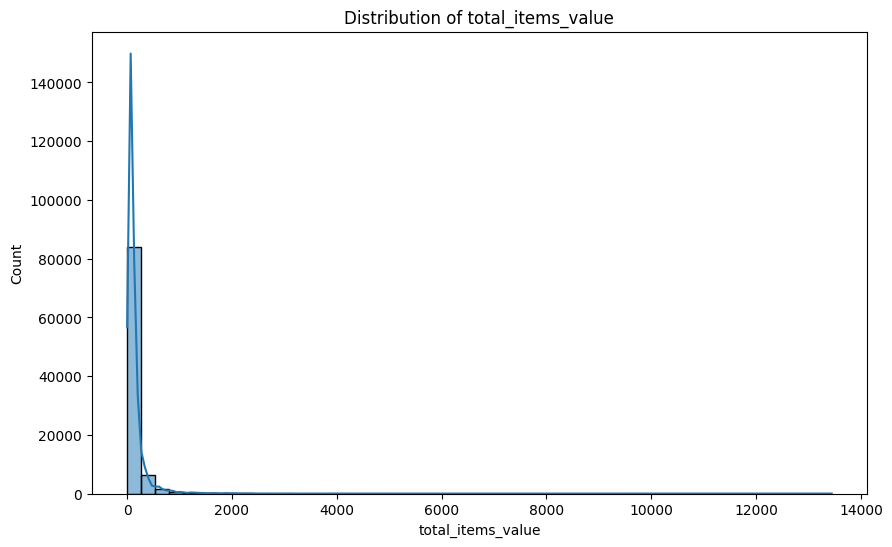

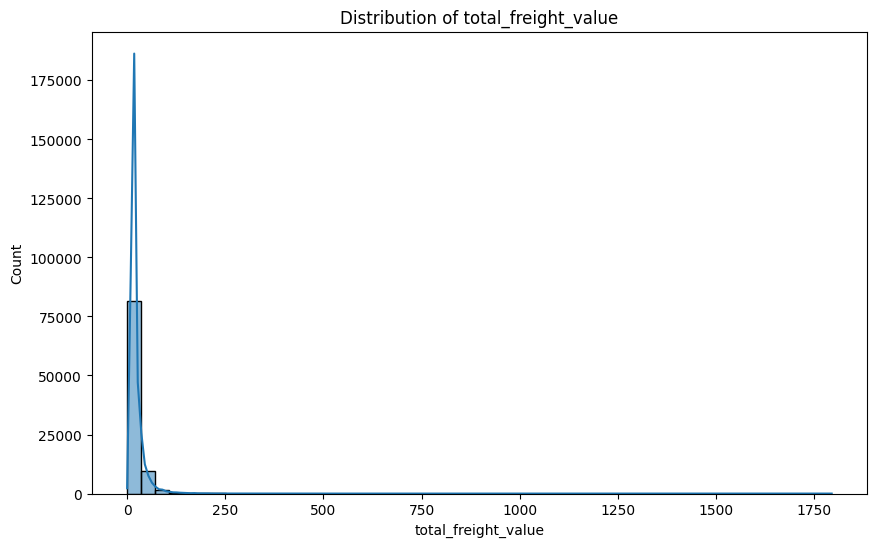

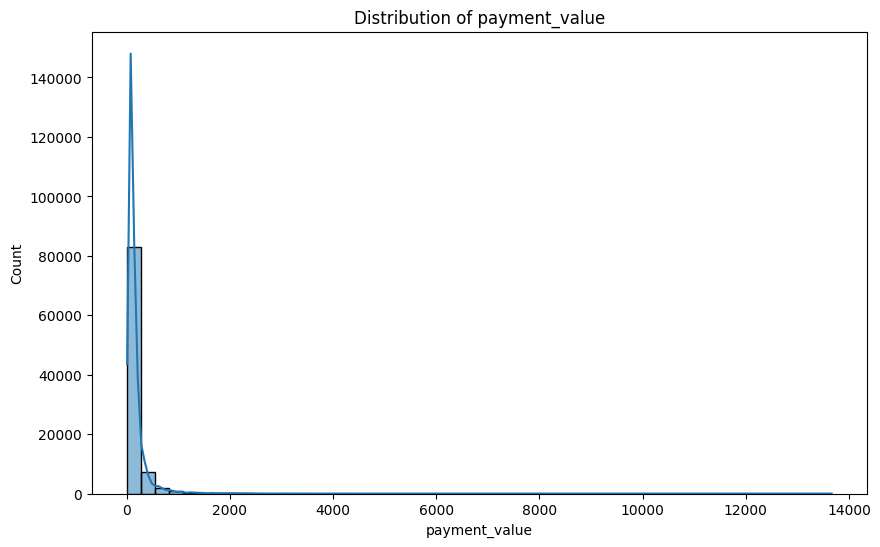

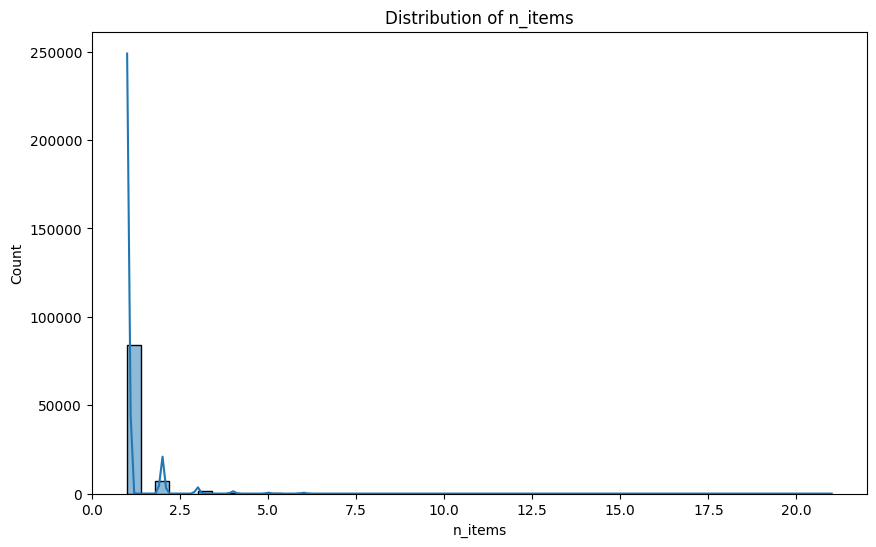

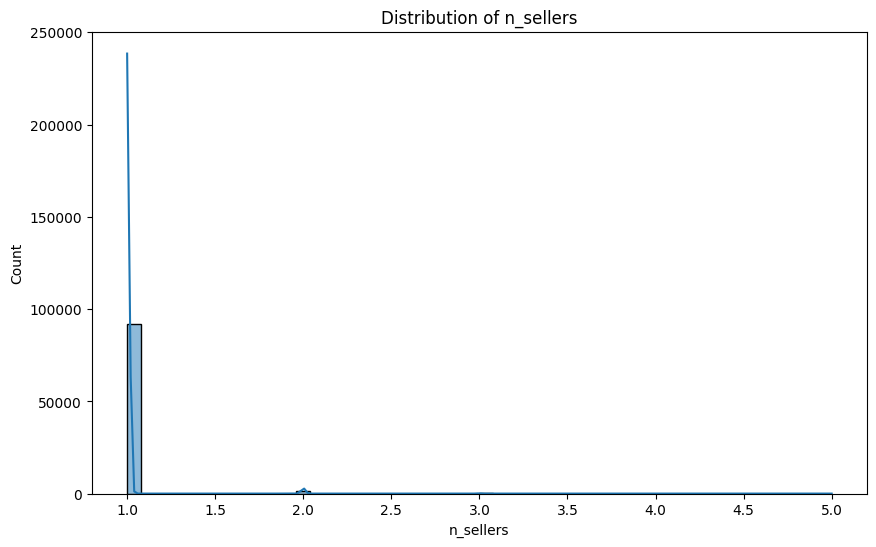

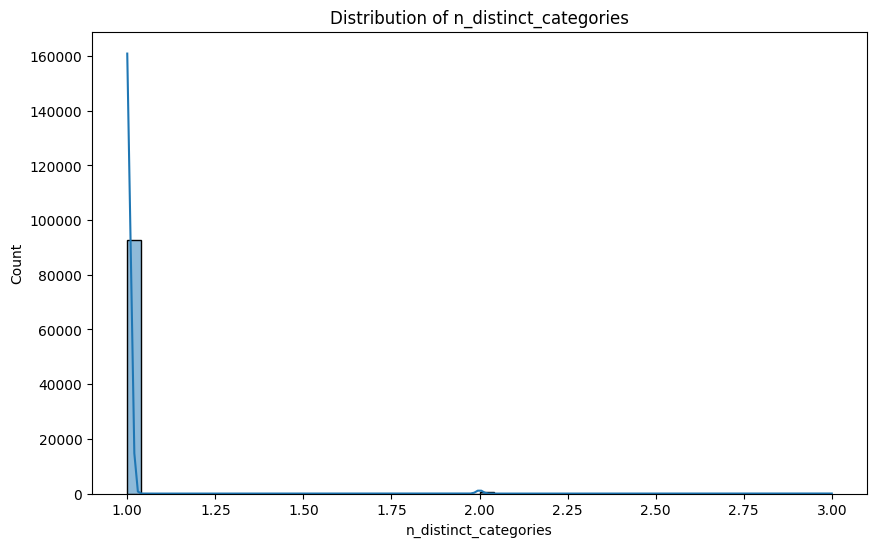

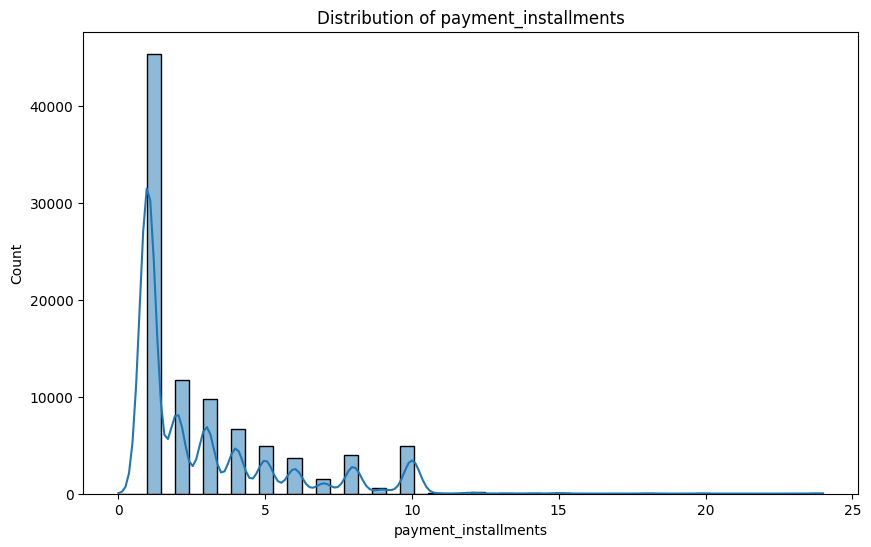

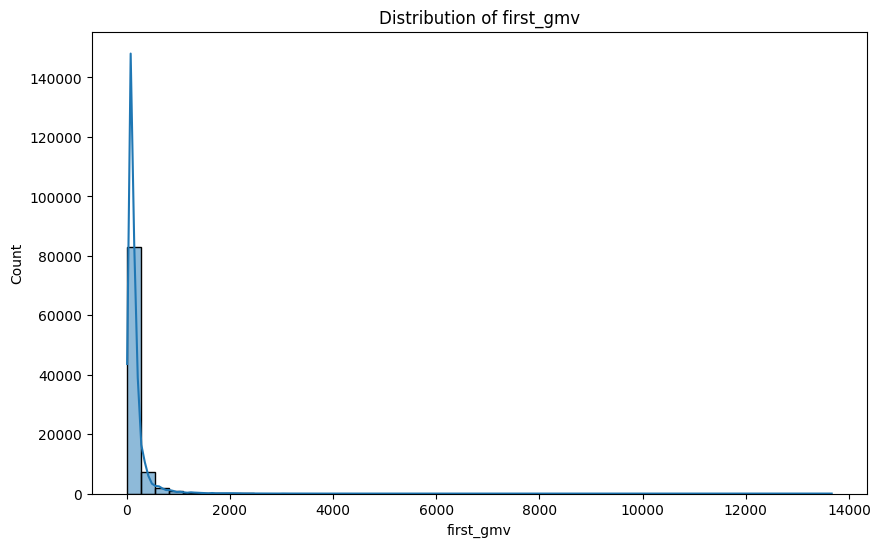

In [20]:
num_cols = ["total_items_value", "total_freight_value", "payment_value", 
            "n_items", "n_sellers", "n_distinct_categories", 
            "payment_installments", "first_gmv"]

for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"../artifacts/images/classification_EDA/histogram_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()

##### NOTE: *Highly skewed distributions. Scaling required.*

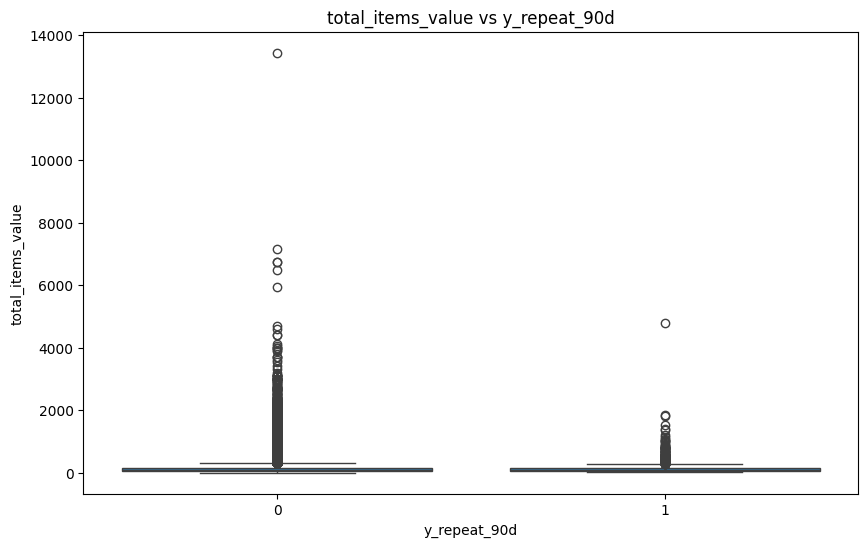

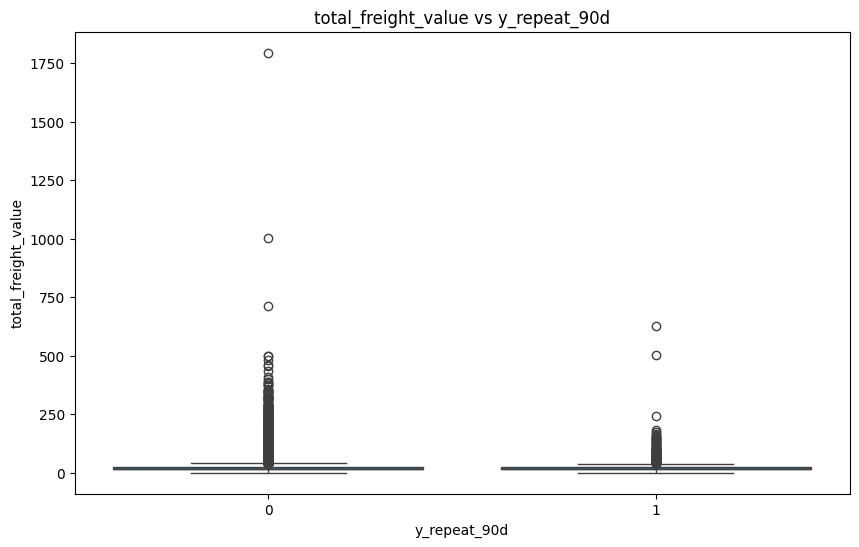

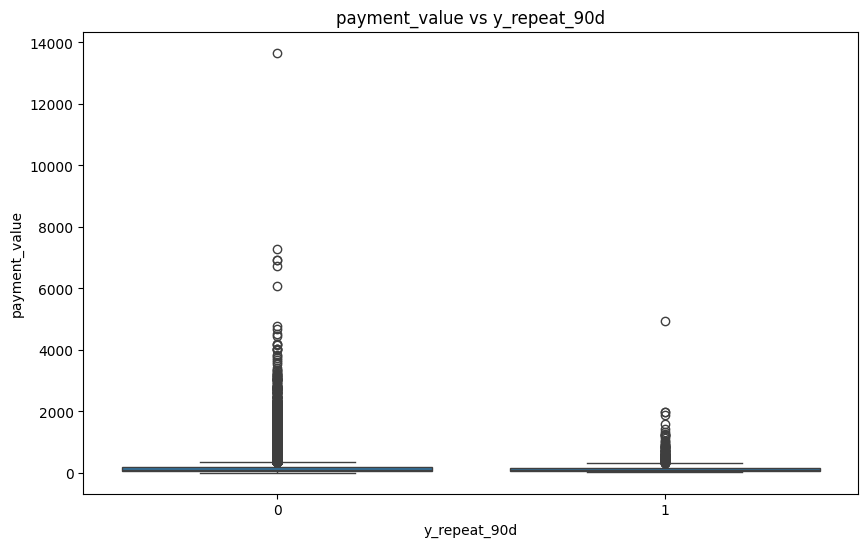

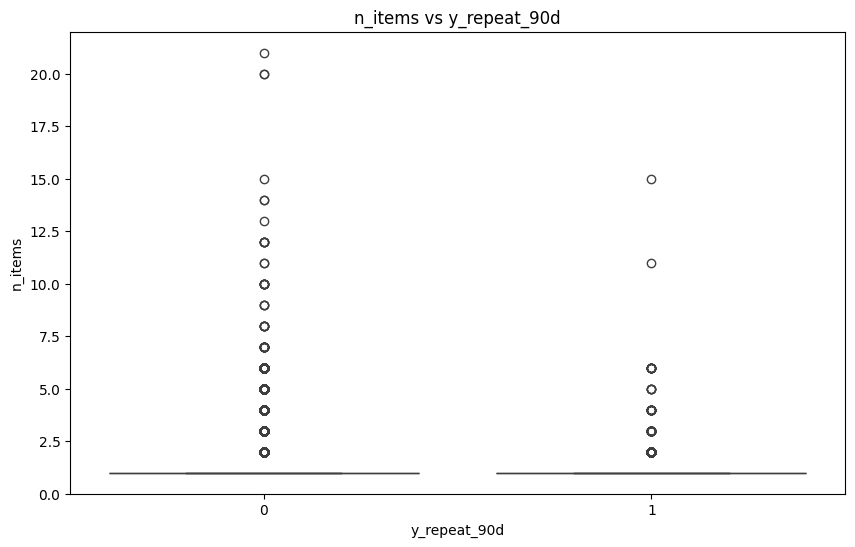

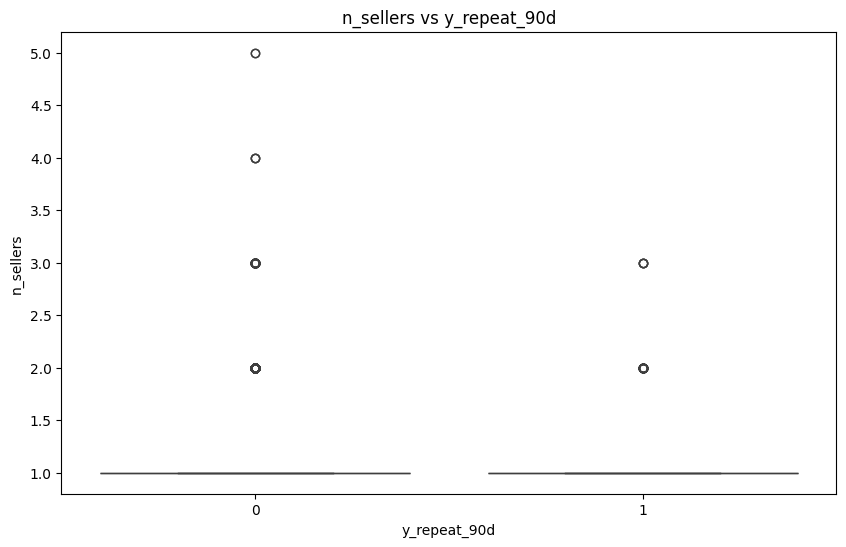

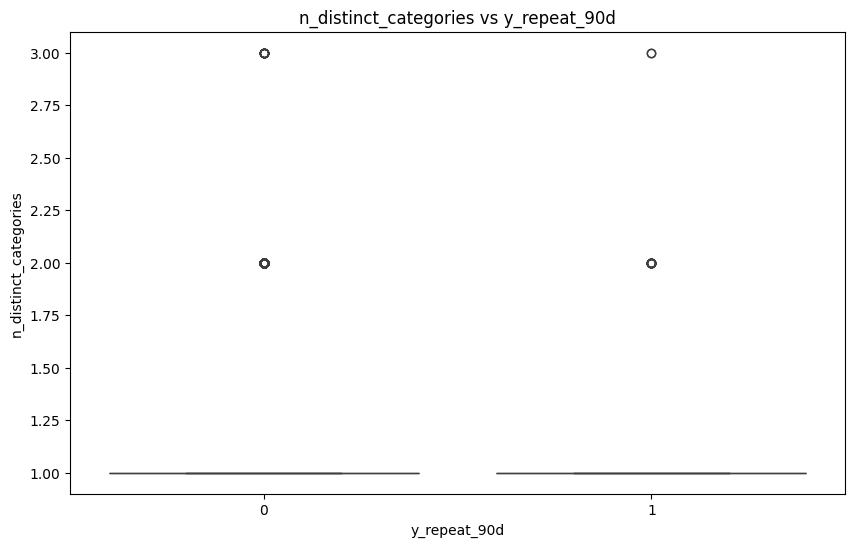

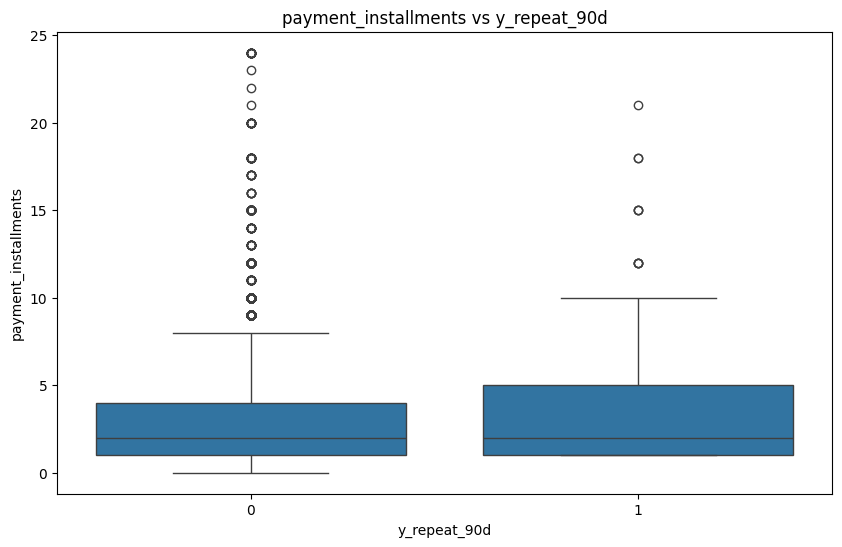

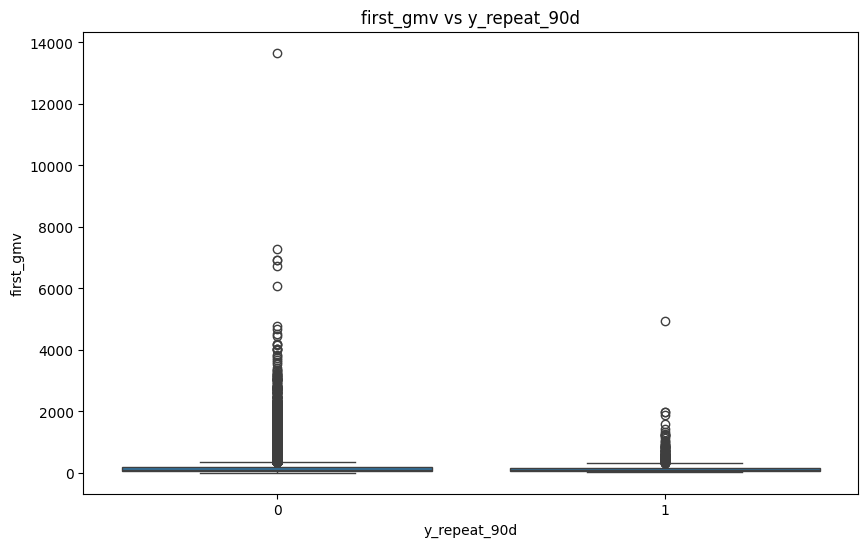

In [21]:
for col in num_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="y_repeat_90d", y=col)
    plt.title(f"{col} vs y_repeat_90d")
    plt.savefig(f"../artifacts/images/classification_EDA/box_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()

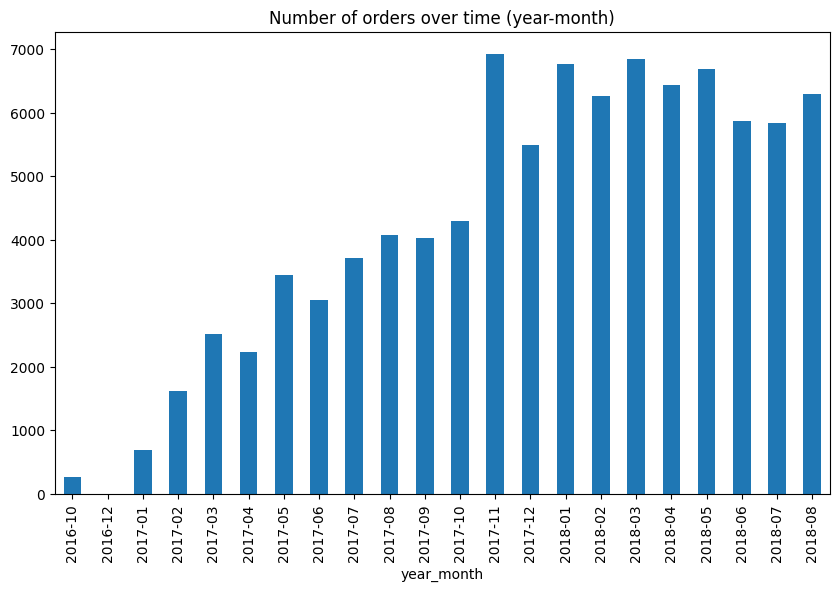

In [22]:
df["year_month"] = df["t0_order_date"].dt.to_period("M")
plt.figure(figsize=(10,6))
df["year_month"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of orders over time (year-month)")
plt.xticks(rotation=90)
plt.savefig("../artifacts/images/classification_EDA/orders_over_time.png", dpi=300, bbox_inches="tight")
plt.show()

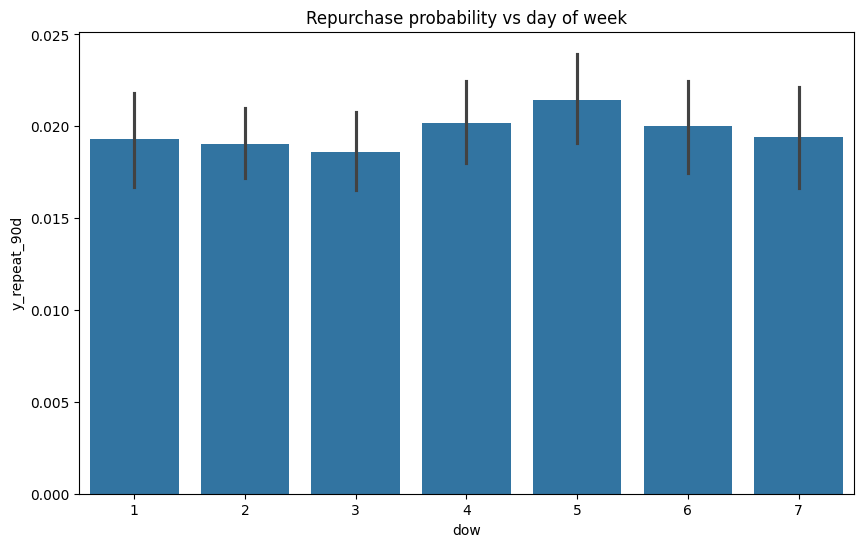

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="dow", y="y_repeat_90d")
plt.title("Repurchase probability vs day of week")
plt.savefig("../artifacts/images/classification_EDA/dow_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()

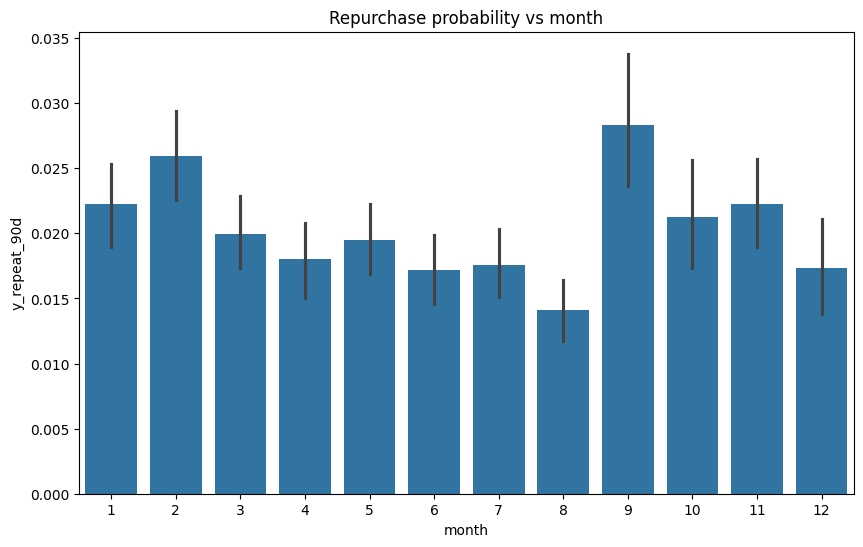

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="month", y="y_repeat_90d")
plt.title("Repurchase probability vs month")
plt.savefig("../artifacts/images/classification_EDA/month_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *Cyclic categorical data. Possible encoding to sin/cos.*

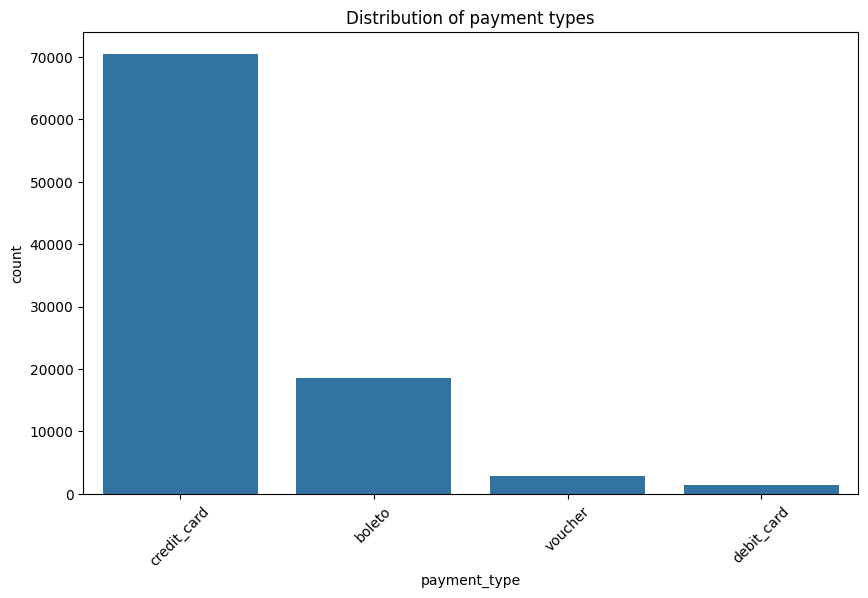

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="payment_type", order=df["payment_type"].value_counts().index)
plt.title("Distribution of payment types")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/payment_type_dist.png", dpi=300, bbox_inches="tight")
plt.show()

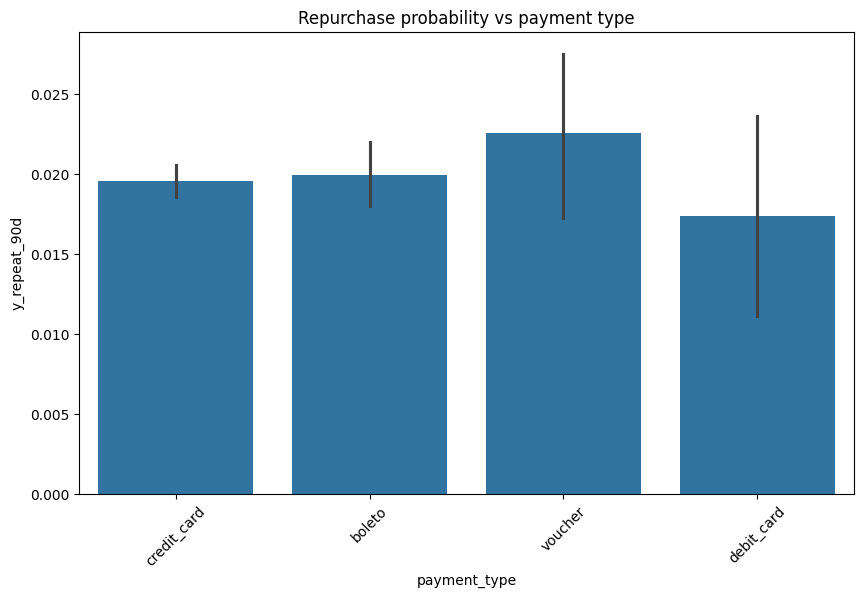

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="payment_type", y="y_repeat_90d",
            order=df["payment_type"].value_counts().index)
plt.title("Repurchase probability vs payment type")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/payment_type_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *payment_installments I will leave as integer, but payment_type I will encoder with OneHotEncoder.*

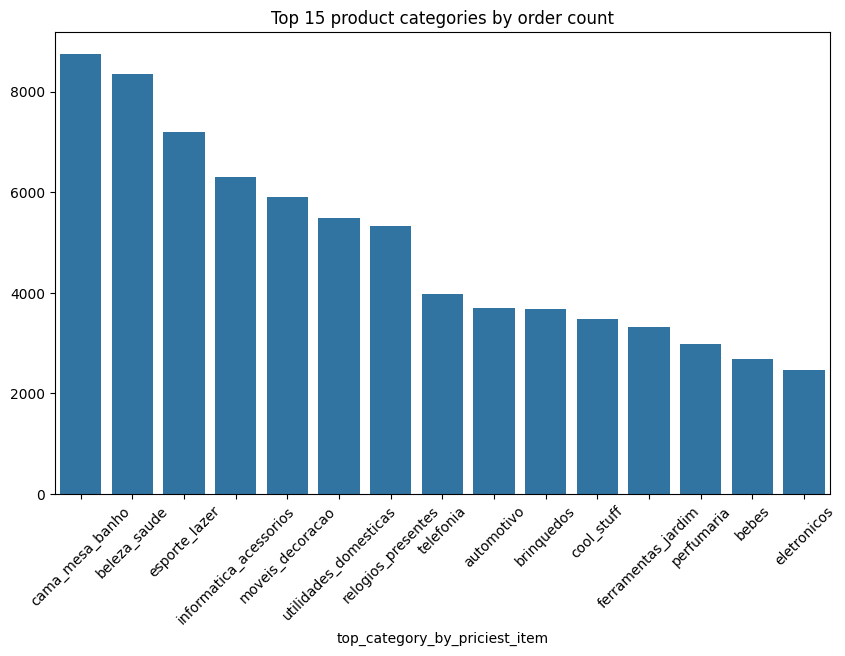

In [27]:
plt.figure(figsize=(10,6))
top_cats = df["top_category_by_priciest_item"].value_counts().head(15)
sns.barplot(x=top_cats.index, y=top_cats.values)
plt.title("Top 15 product categories by order count")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/top_categories.png", dpi=300, bbox_inches="tight")
plt.show()

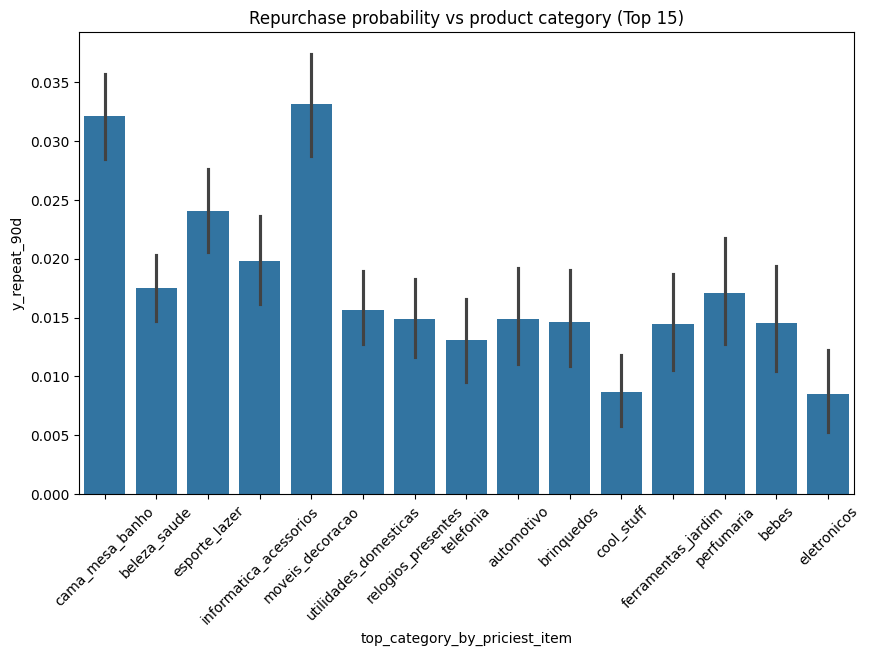

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="top_category_by_priciest_item", y="y_repeat_90d",
            order=df["top_category_by_priciest_item"].value_counts().head(15).index)
plt.title("Repurchase probability vs product category (Top 15)")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/category_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *I will encode categories with OneHotEncoder or target encoding (maybe top 20 and rest dump to "others").*

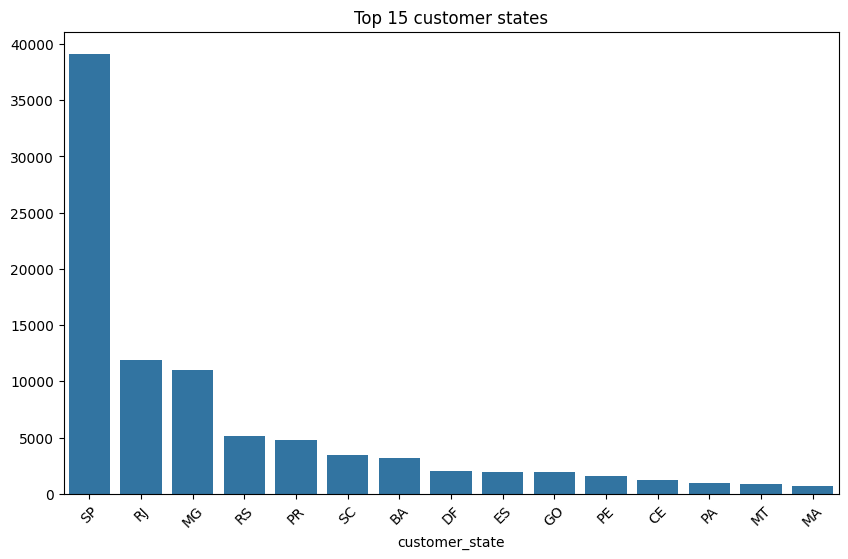

In [29]:
plt.figure(figsize=(10,6))
top_states = df["customer_state"].value_counts().head(15)
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 15 customer states")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/top_states.png", dpi=300, bbox_inches="tight")
plt.show()

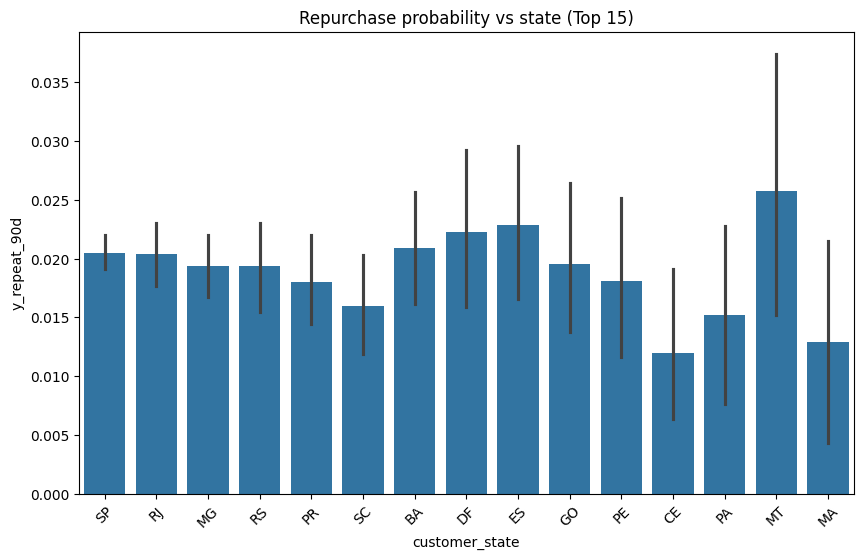

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="customer_state", y="y_repeat_90d",
            order=df["customer_state"].value_counts().head(15).index)
plt.title("Repurchase probability vs state (Top 15)")
plt.xticks(rotation=45)
plt.savefig("../artifacts/images/classification_EDA/state_vs_target.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *I will encode customer_state, but customer_city has too many values and I will drop it.*

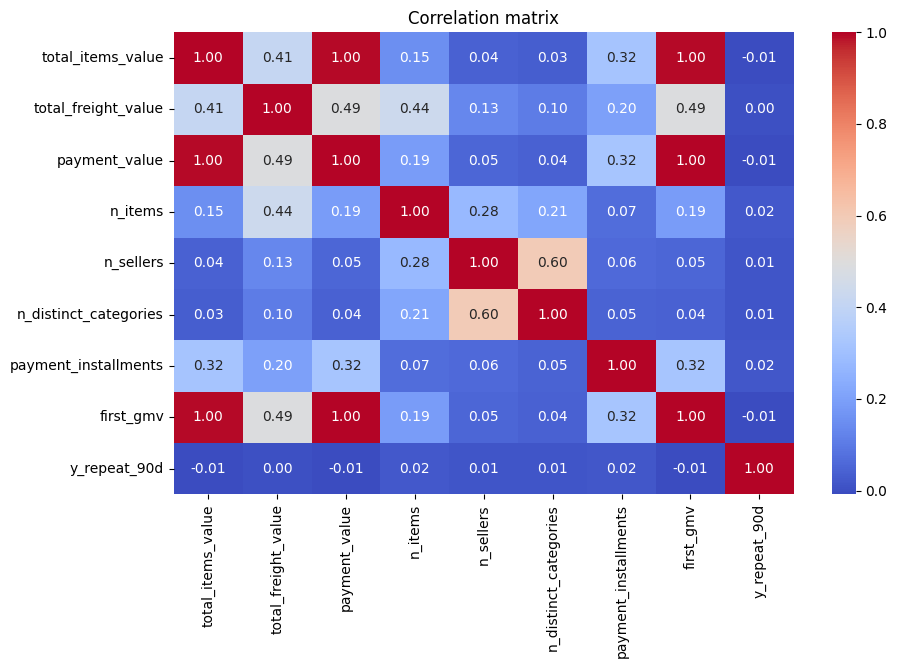

In [31]:
plt.figure(figsize=(10,6))
corr = df[num_cols + ["y_repeat_90d"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.savefig("../artifacts/images/classification_EDA/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
df.drop(["first_gmv", "total_items_value"], axis=1, inplace=True)

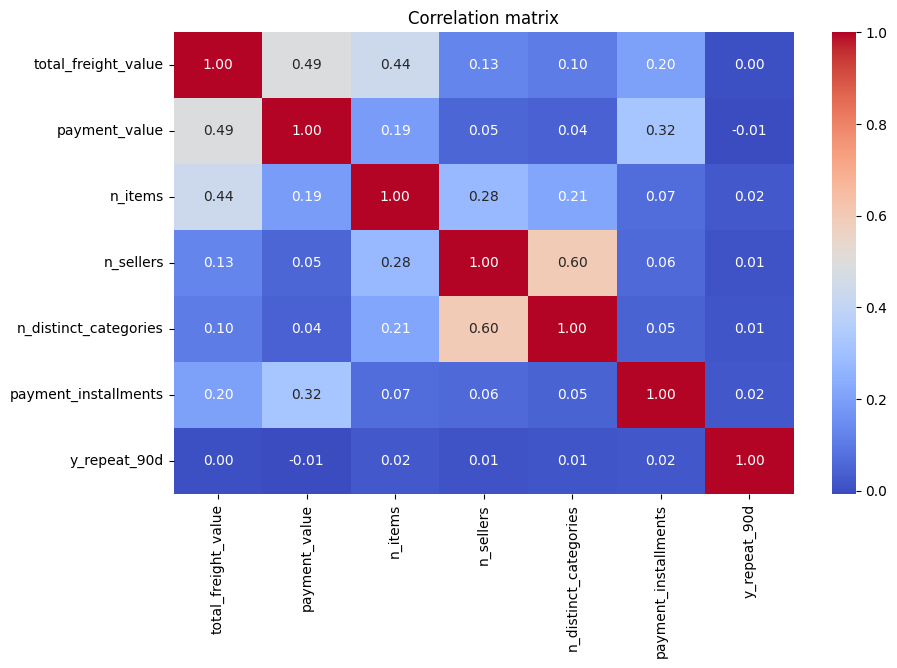

In [33]:
num_cols = ["total_freight_value", "payment_value", 
            "n_items", "n_sellers", "n_distinct_categories", 
            "payment_installments"]

plt.figure(figsize=(10,6))
corr = df[num_cols + ["y_repeat_90d"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.savefig("../artifacts/images/classification_EDA/fixed_correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

##### NOTE: *total_items_value, payment_value and first_gmv have too strong coorelation. I will leave only one; payment_value.*